# Fundamentals of Machine Learning - Exercise 3
* Goal of the excercise is to learn about more advanced vizualization techniques.


![meme1](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_03_meme_02.jpg?raw=true)


## We will use House prices dataset once more

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import packages

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv

In [4]:
df = pd.read_csv(
'https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv'
)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

## 🔎 What does the *...* in the middle of table columns mean?

### 💡 Hint: If the dataset has too many columns, it is good to set pandas parameter **display.max_columns** to None so there is no such limit

In [3]:
with pd.option_context('display.max_columns', None):
    display(df)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

# Let's start with the plots already!

# 📊 Pairplot
* Plot pairwise relationships in a dataset
    * i.e. **Scatterplots for multiple pairs of numerical attributes**
    * See [this](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for more details

## Select only interesting features for pairplot visualization
* 💡 The pairplot might be too big to see anything in the visualization otherwise
* Select just subset of features and use *vars* parameter for it

> ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

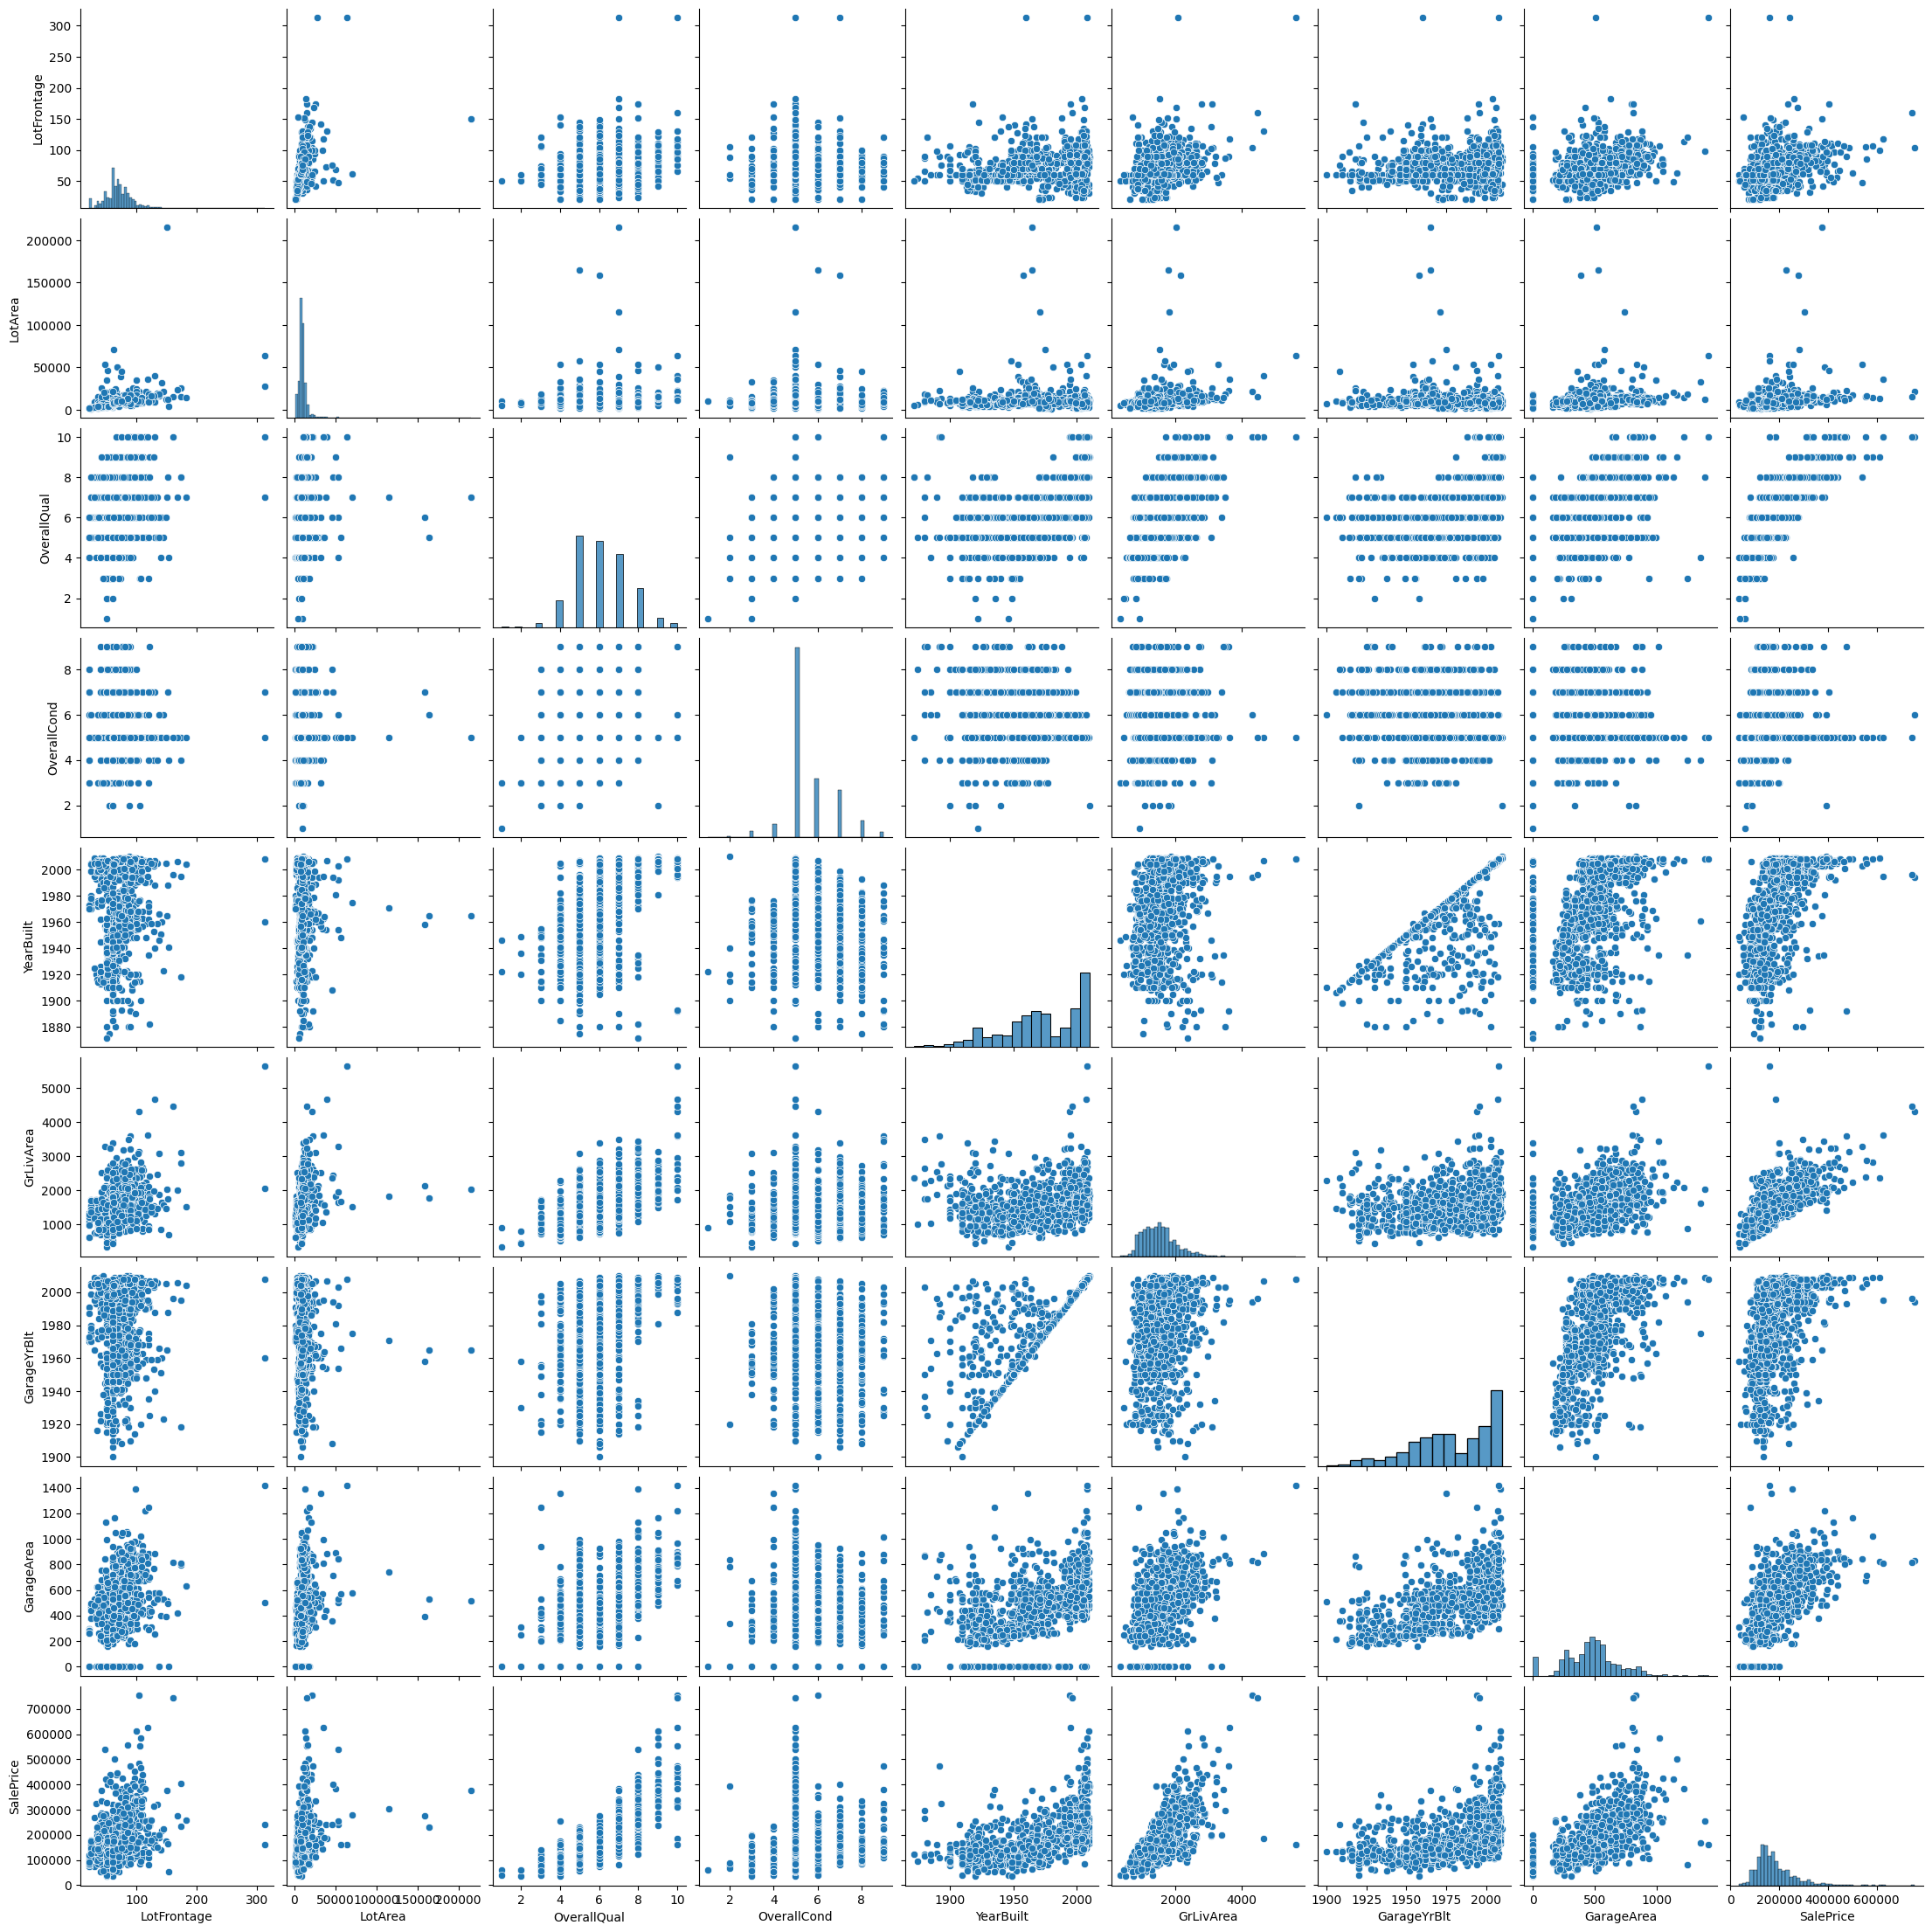

In [7]:
features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']
sns.pairplot(data=df, vars=features)

## 💡 Notice that both OverallQual and OverallCond columns are rather categorical features
* Even though they are represented by numerical values
    * So one would expect that the features are numerical, but they aren't

* Scatter plot may not be the best way to visualize this type of data
    * 🔎 What type of plot is more reseonable?

* Let's select only appropropriate features this time
* Also distinguish among different **BldgType** in the plot
    * *hue* parameter 

> ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

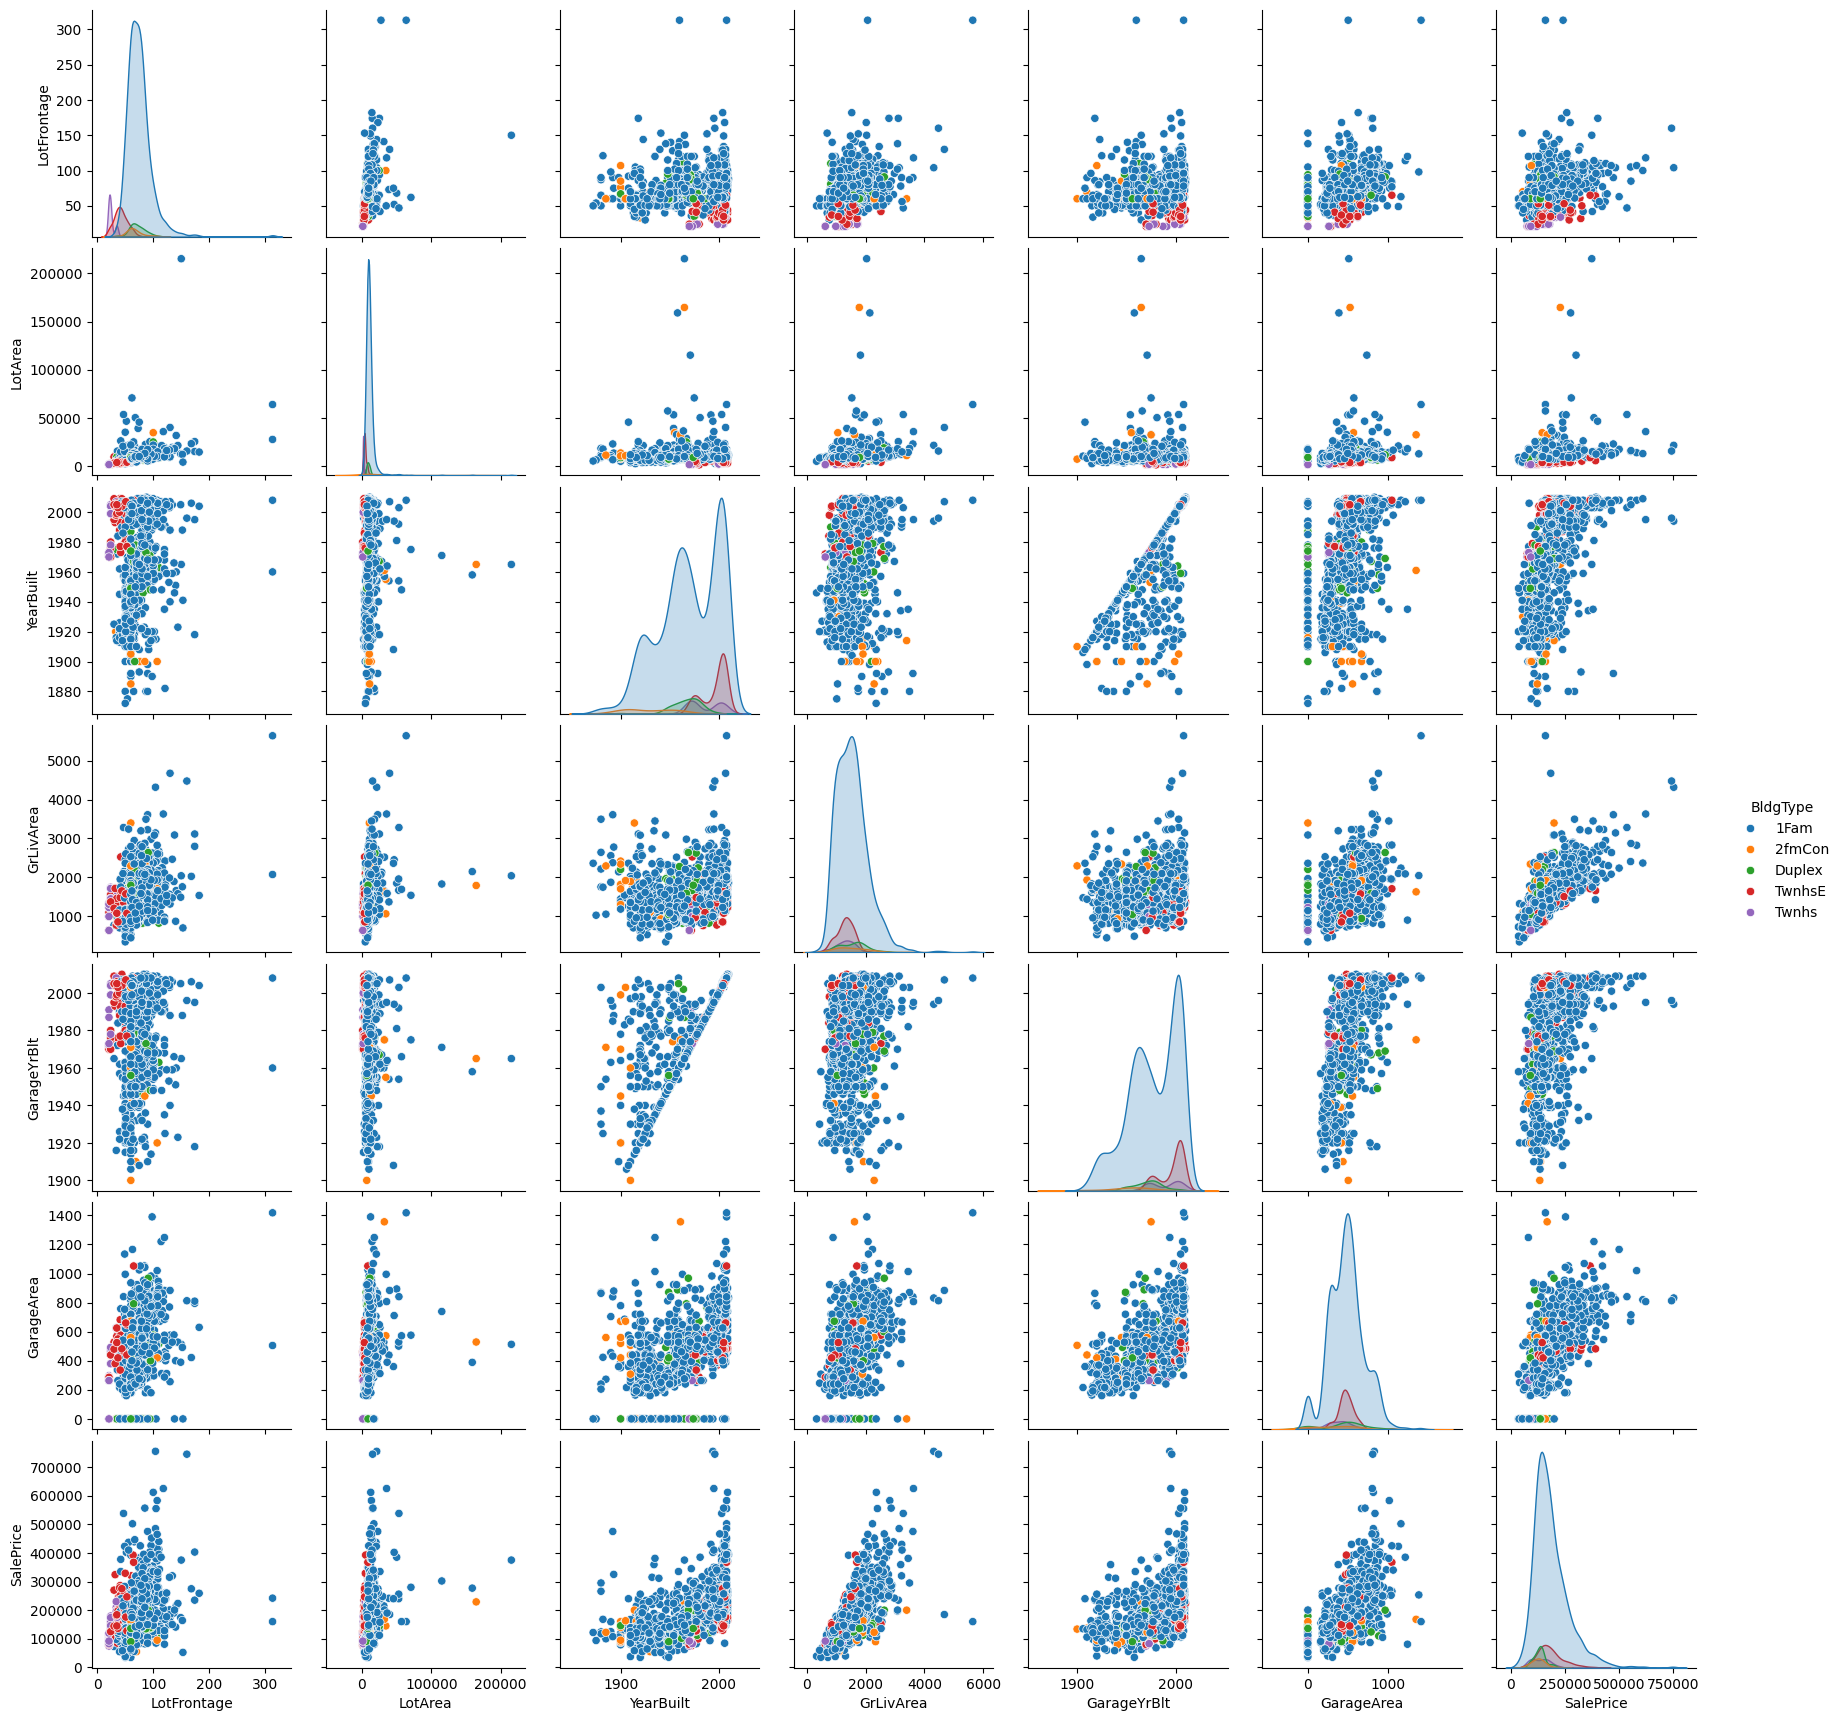

In [9]:
features = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']
sns.pairplot(data=df, vars=features, hue=df.BldgType.name)

## In the following steps we want to threat OverallQual and OverallCond as categories instead of numbers
* for modifying of column's types you can use function *astype*

In [17]:
df[[df.OverallQual.name, df.OverallCond.name]]

OverallQual  OverallCond
0               7            5
1               6            8
2               7            5
3               7            5
4               8            5
...           ...          ...
1455            6            5
1456            6            6
1457            7            9
1458            5            6
1459            5            6

[1460 rows x 2 columns]

In [38]:
for col in ["OverallQual", "OverallCond"]:
    df[col] = df[col].astype("str")


In [40]:
df[[df.OverallQual.name, df.OverallCond.name]].dtypes

OverallQual    object
OverallCond    object
dtype: object

# 🔎 Are you able to say which categorical attributes affect the price right now?
- Yeah... me neither so let's find out by plotting the data first 🙂

## Start with a selection of only the categorical features
* Use *select_dtypes* function with *exclude* parameter to get rid of numerical (*np.number*) attributes
    * Save these column names into a variable
* Loop over the selected columns and fill *NaN* values with **'MISSING'** string

In [52]:
qualitative_columns = df.select_dtypes(exclude=np.number).columns
qualitative_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [56]:
df[qualitative_columns].isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageQual         81
GarageFinish       81
GarageType         81
GarageCond         81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
Electrical          1
Condition1          0
HouseStyle          0
BldgType            0
Condition2          0
Utilities           0
LandContour         0
LotShape            0
Street              0
MSZoning            0
Neighborhood        0
LandSlope           0
LotConfig           0
RoofStyle           0
Heating             0
ExterCond           0
Foundation          0
OverallCond         0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
OverallQual         0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
SaleType            0
SaleCondition       0
dtype: int

In [62]:
for c in qualitative_columns:
    df.fillna({ c: "MISSING" }, inplace=True)

In [64]:
df[qualitative_columns].head()

MSZoning Street    Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave  MISSING      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave  MISSING      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave  MISSING      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave  MISSING      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave  MISSING      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive   PoolQC    Fence MiscFeature SaleType SaleCondition  
0          Y  MISSING  MISSING     MISSING       WD        Normal  
1          Y  MISSING  MISSING     MISSING       WD        Normal  
2          Y  MISSING  MISSING     MISSING       WD        Normal  
3          Y  MISSING  MISSING     MISSING       WD       Abnorml  
4          Y  MISSING  MISSING     MISSING       WD        Normal  

[5 rows x 45 columns]

In [65]:
df[qualitative_columns].isna().sum().sort_values(ascending=False)

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

## Check the result

In [66]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  MISSING      Reg   
1   2          20       RL         80.0     9600   Pave  MISSING      Reg   
2   3          60       RL         68.0    11250   Pave  MISSING      IR1   
3   4          70       RL         60.0     9550   Pave  MISSING      IR1   
4   5          60       RL         84.0    14260   Pave  MISSING      IR1   

  LandContour Utilities  ... PoolArea   PoolQC    Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0  MISSING  MISSING     MISSING       0   
1         Lvl    AllPub  ...        0  MISSING  MISSING     MISSING       0   
2         Lvl    AllPub  ...        0  MISSING  MISSING     MISSING       0   
3         Lvl    AllPub  ...        0  MISSING  MISSING     MISSING       0   
4         Lvl    AllPub  ...        0  MISSING  MISSING     MISSING       0   

  MoSold YrSold SaleType SaleCondition  SalePrice  
0      2   2008       WD        Normal     208500  
1      5   2007       WD        Normal     181500  
2      9   2008       WD        Normal     223500  
3      2   2006       WD       Abnorml     140000  
4     12   2008       WD        Normal     250000  

[5 rows x 81 columns]

![meme2](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_03_meme_01.jpg?raw=true)

# 📊 Very useful feature is the [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function 
* It is useful for defining our own grids for plots based on our needs

## We will plot boxplots of *SalePrice* along with the value counts using barplot for each categorical feature
* **🔎 Why is this pair of plots useful?**

* The *subplots* function has 3 important parameters
    1. Number of rows - *nrows*
    2. Number of columns - *ncols*
    3. Figure size - *figsize*
* It returns a *figure* and *axes* objects
    * The *axes* contains reference to individual subplots
    * 💡 Use *flat* property to access 1D array of subplots

/tmp/ipykernel_1971894/3508436745.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
/tmp/ipykernel_1971894/3508436745.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_right.set_xticklabels(ax_right.xaxis.get_majorticklabels(), rotation=60)
/tmp/ipykernel_1971894/3508436745.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
/tmp/ipykernel_1971894/3508436745.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_right.set_xticklabels(ax_right.xaxis.get_majorticklabels(), rotation=60)
/tmp/ipykernel_197

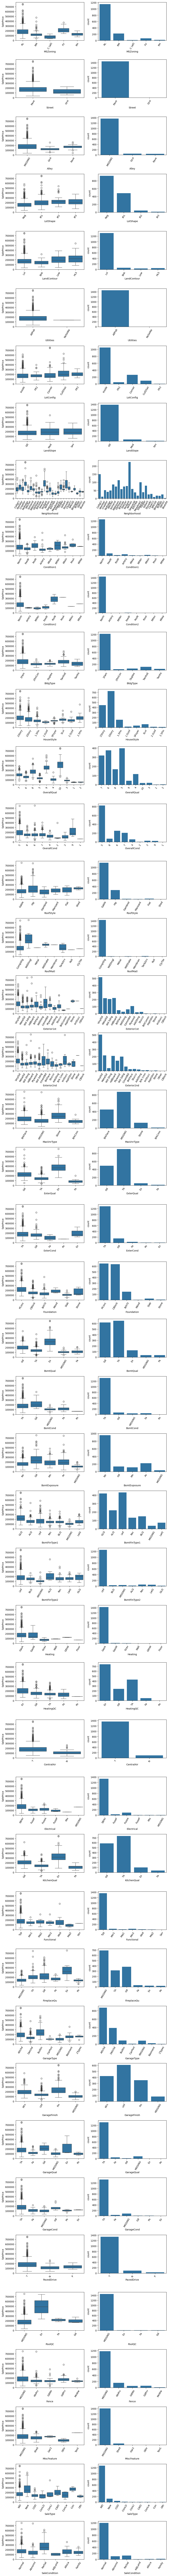

In [82]:
# creates nrows * ncols plots with specified figsize
fig, axes = plt.subplots(nrows=len(qualitative_columns), ncols=2, figsize=(10, 150))

for i, col in enumerate(qualitative_columns):
    ax_left = axes.flat[2*i]
    ax_right = axes.flat[2*i + 1]
    sns.boxplot(data=df, x=col, y='SalePrice', ax=ax_left)
    ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
    sns.countplot(data=df, x=col, ax=ax_right)
    ax_right.set_xticklabels(ax_right.xaxis.get_majorticklabels(), rotation=60)
        
fig.tight_layout()

In [ ]:
# creates nrows * ncols plots with specified figsize
fig, axes = plt.subplots(nrows=len(qualitative_columns), ncols=2, figsize=(10, 150))

In [75]:
len(axes.flat) == len(qualitative_columns) * 2

True

In [80]:
for i, col in enumerate(qualitative_columns):
    # assuming .flat makes the accessing to the axes
    # the same as accesing an array
    ax_left = axes.flat[2 * i]
    ax_right = axes.flat[2 * i + 1]

    # plot to individual axes
    sns.boxplot(data=df, x=col, y='SalePrice', ax=ax_left)

    sns.countplot(data=df, x=col, ax=ax_right)

In [81]:
fig.tight_layout()

# 📊 Correlation
* 🔎 What does the *correlation coefficient* tell you?
* What is the range of it?
* Is it useful for each type of relationship?
* 💡 **Correlation is not causation**
    * e.g. Ice cream sales X Number of thefts

- Take a look at [this link](https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/)
- See also [this](https://www.simplypsychology.org/correlation.html) or [this](https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp) for some more info about the topic

## We can compute the correlation matrix using *corr()* function
* Select columns first

> ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

In [84]:
selected_columns = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']
df[selected_columns].corr()

LotFrontage   LotArea  YearBuilt  GrLivArea  GarageYrBlt  \
LotFrontage     1.000000  0.426095   0.123349   0.402797     0.070250   
LotArea         0.426095  1.000000   0.014228   0.263116    -0.024947   
YearBuilt       0.123349  0.014228   1.000000   0.199010     0.825667   
GrLivArea       0.402797  0.263116   0.199010   1.000000     0.231197   
GarageYrBlt     0.070250 -0.024947   0.825667   0.231197     1.000000   
GarageArea      0.344997  0.180403   0.478954   0.468997     0.564567   
SalePrice       0.351799  0.263843   0.522897   0.708624     0.486362   

             GarageArea  SalePrice  
LotFrontage    0.344997   0.351799  
LotArea        0.180403   0.263843  
YearBuilt      0.478954   0.522897  
GrLivArea      0.468997   0.708624  
GarageYrBlt    0.564567   0.486362  
GarageArea     1.000000   0.623431  
SalePrice      0.623431   1.000000

## 📊 Vizualize the matrix using *heatmap* plot

<Axes: >

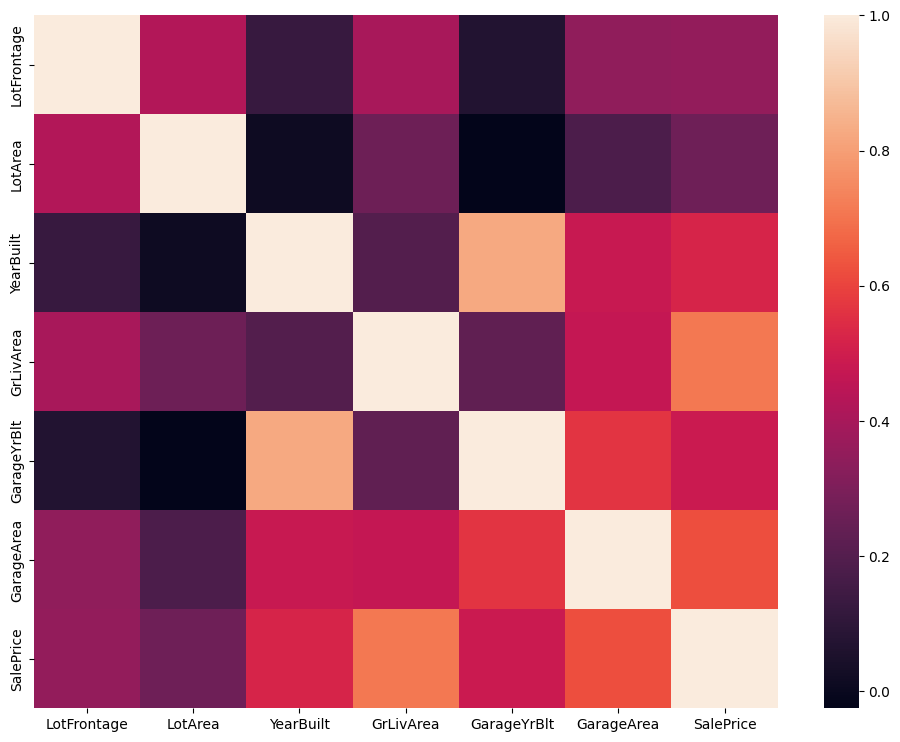

In [87]:
plt.figure(figsize=(12, 9))
corr_matrix = df[selected_columns].corr()
sns.heatmap(data=corr_matrix)


## Which color scheme will be more appropropriate for corellation representation?
- Change color map *cmap* (e.g. RdYlGn)
- Set limits to adjust color map values from -1 to 1
    - Attributes *vmin*, *vmax*

<Axes: >

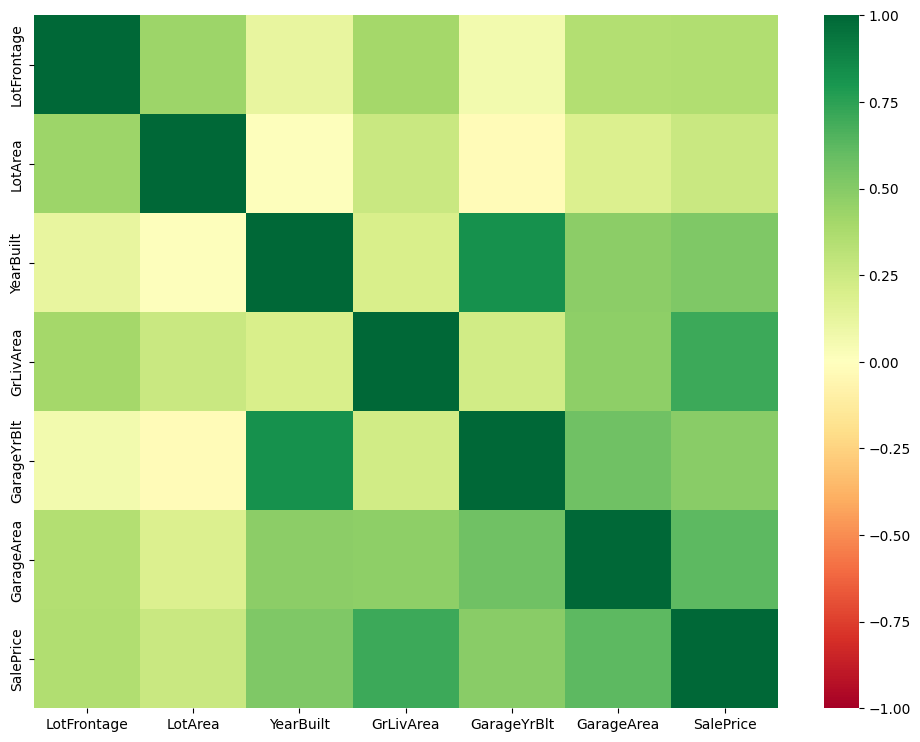

In [105]:
plt.figure(figsize=(12, 9))
corr_matrix = df[selected_columns].corr()
# change the color map
# and change the min and max value of the graph
# -1 to 1 because corr(x,y) maps to values in [-1, 1]
# corr(x,y) is normalized cov(x,y) because corr(x,y) = cov(x,y)/(stddev(x) * stddev(y)) 
sns.heatmap(data=corr_matrix, cmap='RdYlGn', vmin = -1) #, vmax = 1)


## Add values to the heatmap and amplify heatmap's readability
* Use *cmap=sns.light_palette("seagreen", as_cmap=True)* color map
* Set minimum value to **0.3**
* Enable annotations using *annot* parameter
* Plot each column as a *square* (same name of the parameter)

<Axes: >

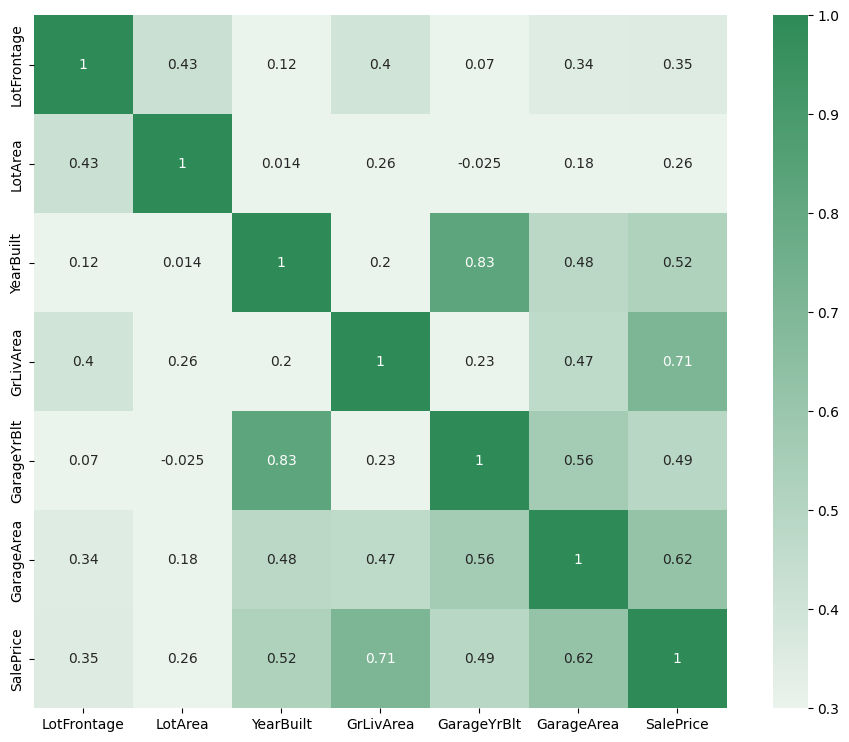

In [116]:
plt.figure(figsize=(12, 9))

corr_matrix = df[selected_columns].corr()

new_cmap = sns.light_palette(color="seagreen", as_cmap=True)

sns.heatmap(data=corr_matrix, cmap=new_cmap, vmin = 0.3, annot=True, square=True) #, vmax = 1)


# 💡 I highly recommend taking a look at the plot gallery for some more plots!
* https://seaborn.pydata.org/api.html

## 📊 Let's try for example scatter plot with regression line fron the example gallery
* 🔎 What insight does it give us about the trend?

In [ ]:
fig = plt.figure(figsize=(12, 12))
sns.regplot(data = df, x='GrLivArea', y='SalePrice')
plt.show()

In [128]:

def getOutlyingCond(df: pd.DataFrame, column: str):
    q1, q3 = df[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_whisker = q1 - 1.5*iqr
    upper_whisker = q3 + 1.5*iqr
    return ~( (lower_whisker < df[column]) & (df[column] < upper_whisker) )


In [132]:
df['Outlier'] = False
df.loc[getOutlyingCond(df, df.GrLivArea.name), 'Outlier'] = True
df.loc[getOutlyingCond(df, df.SalePrice.name), 'Outlier'] = True


In [134]:
df.Outlier.value_counts()

Outlier
False    1383
True       77
Name: count, dtype: int64

In [144]:
df_no_outliers = df.loc[df.Outlier == True]
df_no_outliers

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley  \
11      12          60       RL         85.0    11924   Pave  MISSING   
53      54          20       RL         68.0    50271   Pave  MISSING   
58      59          60       RL         66.0    13682   Pave  MISSING   
112    113          60       RL         77.0     9965   Pave  MISSING   
118    119          60       RL         90.0    12376   Pave  MISSING   
...    ...         ...      ...          ...      ...    ...      ...   
1353  1354          50       RL         56.0    14720   Pave  MISSING   
1373  1374          20       RL          NaN    11400   Pave  MISSING   
1386  1387          60       RL         80.0    16692   Pave  MISSING   
1388  1389          20       RL         42.0    14892   Pave  MISSING   
1437  1438          20       RL         96.0    12444   Pave  MISSING   

     LotShape LandContour Utilities  ...   PoolQC    Fence MiscFeature  \
11        IR1         Lvl    AllPub  ...  MISSING  MISSING     MISSING   
53        IR1         Low    AllPub  ...  MISSING  MISSING     MISSING   
58        IR2         HLS    AllPub  ...  MISSING  MISSING     MISSING   
112       Reg         Lvl    AllPub  ...  MISSING  MISSING     MISSING   
118       Reg         Lvl    AllPub  ...  MISSING  MISSING     MISSING   
...       ...         ...       ...  ...      ...      ...         ...   
1353      IR1         Lvl    AllPub  ...  MISSING  MISSING     MISSING   
1373      Reg         Lvl    AllPub  ...  MISSING  MISSING     MISSING   
1386      IR1         Lvl    AllPub  ...       Fa    MnPrv        TenC   
1388      IR1         HLS    AllPub  ...  MISSING  MISSING     MISSING   
1437      Reg         Lvl    AllPub  ...  MISSING  MISSING     MISSING   

     MiscVal MoSold YrSold SaleType SaleCondition SalePrice  Outlier  
11         0      7   2006      New       Partial    345000     True  
53         0     11   2006       WD        Normal    385000     True  
58         0     10   2006      New       Partial    438780     True  
112        0     10   2007      New       Partial    383970     True  
118        0      5   2010       WD        Normal    320000     True  
...      ...    ...    ...      ...           ...       ...      ...  
1353       0      3   2010       WD        Normal    410000     True  
1373       0      3   2007       WD        Normal    466500     True  
1386    2000      7   2006       WD        Normal    250000     True  
1388       0     10   2009       WD        Normal    377500     True  
1437       0     11   2008      New       Partial    394617     True  

[77 rows x 82 columns]

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

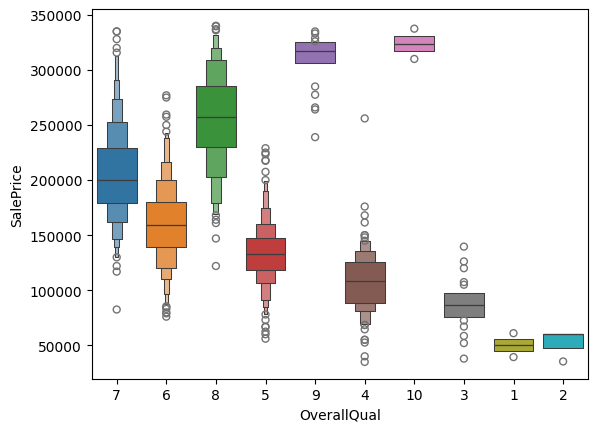

In [147]:
sns.boxenplot(
    data = df.loc[df.Outlier == False],
    y = df.SalePrice.name,
    x = df.OverallQual,
    hue = df.OverallQual
)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

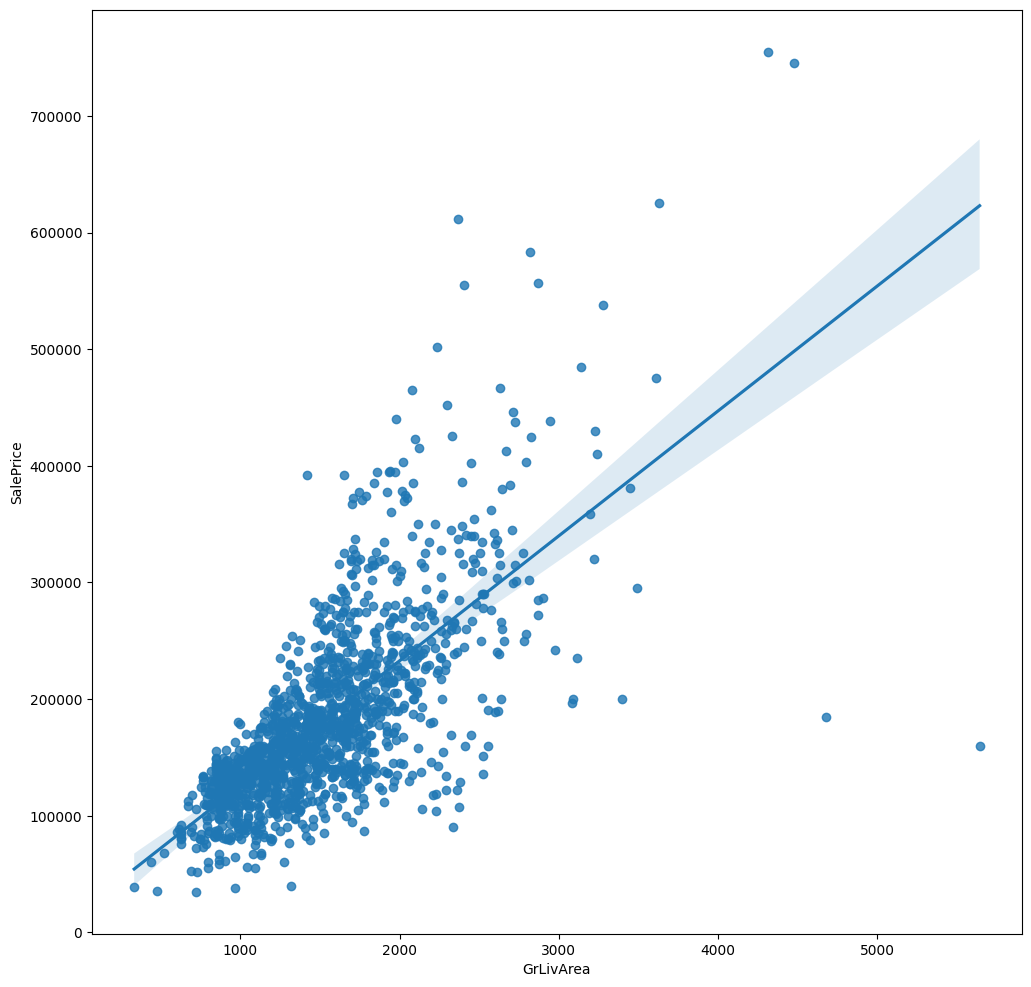

In [150]:
fig = plt.figure(figsize=(12, 12))

sns.regplot(
    data=df, 
    x=df.GrLivArea.name, 
    y=df.SalePrice
)

# ✅ Task (2p)
1. Create two filtered dataframes:
    * The first one *df_fam* will contain only the data for **BldgType** = '1Fam'
    * The second one *df_twn* will contain only the data for **BldgType** = 'Twnhs' or 'TwnhsE'


In [154]:
df_fam = df.loc[df.BldgType == '1Fam']
df_fam['BldgType'].head()

0    1Fam
1    1Fam
2    1Fam
3    1Fam
4    1Fam
Name: BldgType, dtype: object

In [159]:
df_twn = df.loc[(df.BldgType == 'Twnhs') | (df.BldgType == 'TwnhsE')]
df_twn['BldgType'].head()

23    TwnhsE
34    TwnhsE
45    TwnhsE
56     Twnhs
62    TwnhsE
Name: BldgType, dtype: object

2. Plot two correlation matrices
    * 💡 One for each of the datasets and use these features:
    > ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']


In [160]:
selected_facets = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

In [ ]:
df_fam[selected_facets].corr()


LotFrontage   LotArea  YearBuilt  GrLivArea  GarageYrBlt  \
LotFrontage     1.000000  0.704570   0.509675   0.340941     0.444367   
LotArea         0.704570  1.000000   0.349402   0.209358     0.290020   
YearBuilt       0.509675  0.349402   1.000000   0.333075     0.987170   
GrLivArea       0.340941  0.209358   0.333075   1.000000     0.261533   
GarageYrBlt     0.444367  0.290020   0.987170   0.261533     1.000000   
GarageArea      0.544419  0.421992   0.634064   0.539924     0.567407   
SalePrice       0.634637  0.598200   0.617315   0.616634     0.572466   

             GarageArea  SalePrice  
LotFrontage    0.544419   0.634637  
LotArea        0.421992   0.598200  
YearBuilt      0.634064   0.617315  
GrLivArea      0.539924   0.616634  
GarageYrBlt    0.567407   0.572466  
GarageArea     1.000000   0.687135  
SalePrice      0.687135   1.000000

In [170]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [171]:
sns.color_palette("Spectral")

[(0.8853517877739331, 0.3190311418685121, 0.29042675893886966),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243),
 (0.6334486735870821, 0.8521337946943485, 0.6436755094194541),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197)]

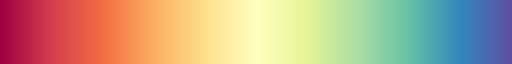

In [178]:
sns.color_palette(palette="Spectral", as_cmap=True)

<Axes: >

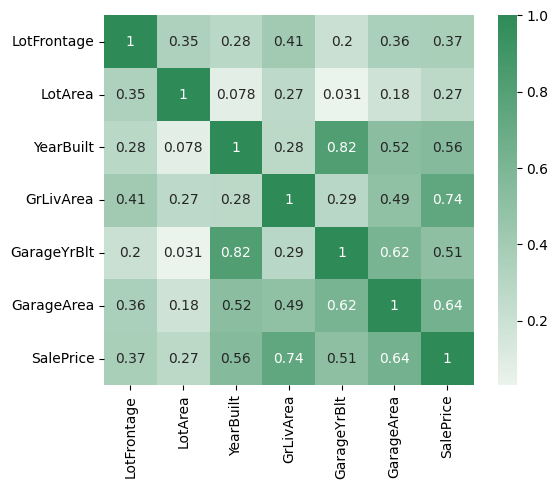

In [199]:
my_cmap = sns.color_palette(palette="Spectral", as_cmap=True)

sns.heatmap(
    data=df_fam[selected_facets].corr(),
    vmin=df_fam[selected_facets].corr().min().min(),
    cmap=new_cmap,
    annot=True,
    robust=True,
    square=True,
)

In [162]:
df_twn[selected_facets].corr()

LotFrontage   LotArea  YearBuilt  GrLivArea  GarageYrBlt  \
LotFrontage     1.000000  0.704570   0.509675   0.340941     0.444367   
LotArea         0.704570  1.000000   0.349402   0.209358     0.290020   
YearBuilt       0.509675  0.349402   1.000000   0.333075     0.987170   
GrLivArea       0.340941  0.209358   0.333075   1.000000     0.261533   
GarageYrBlt     0.444367  0.290020   0.987170   0.261533     1.000000   
GarageArea      0.544419  0.421992   0.634064   0.539924     0.567407   
SalePrice       0.634637  0.598200   0.617315   0.616634     0.572466   

             GarageArea  SalePrice  
LotFrontage    0.544419   0.634637  
LotArea        0.421992   0.598200  
YearBuilt      0.634064   0.617315  
GrLivArea      0.539924   0.616634  
GarageYrBlt    0.567407   0.572466  
GarageArea     1.000000   0.687135  
SalePrice      0.687135   1.000000

In [196]:
df_twn[selected_facets].corr().min()

LotFrontage    0.340941
LotArea        0.209358
YearBuilt      0.333075
GrLivArea      0.209358
GarageYrBlt    0.261533
GarageArea     0.421992
SalePrice      0.572466
dtype: float64

In [197]:
df_twn[selected_facets].corr().min().min()

np.float64(0.20935834600333295)

<Axes: >

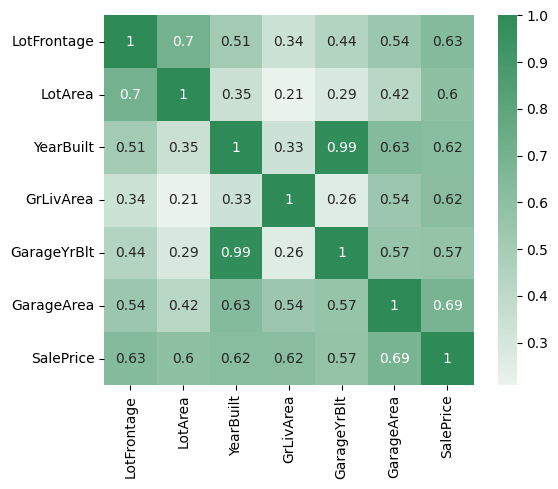

In [198]:
my_cmap = sns.color_palette(palette="Spectral", as_cmap=True)

sns.heatmap(
    data=df_twn[selected_facets].corr(),
    vmin=df_twn[selected_facets].corr().min().min(),
    cmap=new_cmap,
    annot=True,
    robust=True,
    square=True,
)

<Axes: >

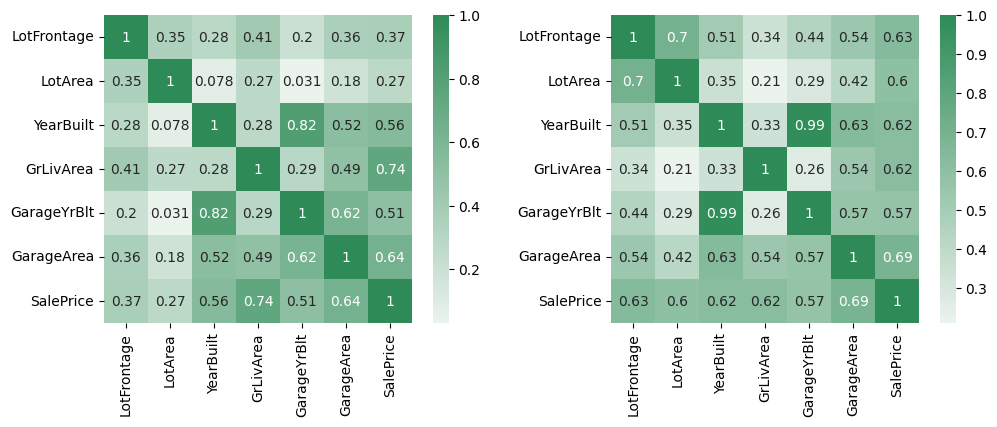

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# with BldgType == 1Fam
sns.heatmap(
    data=df_fam[selected_facets].corr(),
    vmin=df_fam[selected_facets].corr().min().min(),
    cmap=new_cmap,
    annot=True,
    robust=True,
    square=True,
    ax=axes.flat[0],
)

# with BldgType == Twn*
sns.heatmap(
    data=df_twn[selected_facets].corr(),
    vmin=df_twn[selected_facets].corr().min().min(),
    cmap=new_cmap,
    annot=True,
    robust=True,
    square=True,
    ax=axes.flat[1],
)


3. Do you see any differences or similarities in the correlation matrices?
    * Which features you take as correlated and which are not according to you?
    * **Describe the insight you got from the plots with a few sentences in a Markdown cell below the plot**
        * ❌ Plot interpretation figured in real-time during task check is not allowed! ❌

The correlation matrix for Twn* building has stronger values.
YearBuilt and GarageYrBlt.

bla bla, the greener, the more correlated they are.

Except the diagonal which would be Corr(X,X) 
which is just tells that when variable X increases/decreases, then X behaves exactly the same.


